# Modeling

## Daily Dataset 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_d = pd.read_csv("DailyDataset.csv", index_col=0)
df_d = df_d.set_index('Date')
df_d = df_d.dropna()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import r2_score

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold

from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor

#### Dummification

In [4]:
for column in ['Month', 'DayOfW']:
  dummies = pd.get_dummies(df_d[column], prefix=column)
  df_d[dummies.columns] = dummies

#### Splitting

In [5]:
data = df_d.drop(columns=['target_bin', 'target_multi', 'Month', 'DayOfW'])
X, y = data.drop(columns=['Return+1']), data['Return+1']
column_list = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print("Shape", X_train.shape, X_test.shape)

Shape (803, 40) (201, 40)


#### Scaling

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

#### Interpretation tools

In [7]:
def graph_prediction(y_true, y_predicted):
    
    print("MAE : ", MAE(y_true, y_predicted))
    print("MSE : ", MSE(y_true, y_predicted))
    print("MAPE : ", MAPE(y_true, y_predicted))
    print("R2 Score : ", r2_score(y_true, y_predicted))
    
    plt.figure(figsize=(10,5)) 
    plt.scatter(y_true, y_predicted, alpha=0.5)
    
    plt.xlabel('True', size=10)
    plt.ylabel('Predicted', size=10)
    plt.title('Return+1 Prediction')
    plt.legend(fontsize=10)
    plt.show()

In [8]:
def var_importance(model):
	importance = model.best_estimator_.feature_importances_#get importance
 
	plt.figure(figsize=(20, 4)) 
	plt.bar(column_list, importance) #plot feature importance
	plt.xticks(column_list, rotation=90)
	plt.show()

In [9]:
rkf = RepeatedKFold(n_splits=10, n_repeats=2, random_state=1)

#### RandomForestClassifier 

In [10]:
rfc =  RandomForestRegressor()

params_rf = { 
    'n_estimators': [200, 500, 750],
    'max_depth' : [20, 40, 50],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 4, 8],
    'criterion' :['mse']
}

reg_random = RandomizedSearchCV(rfc, params_rf, n_jobs=-1, cv=rkf)
reg_random.fit(X_train, y_train)
y_pred = reg_random.predict(X_test)

No handles with labels found to put in legend.


MAE :  3.037254093332184
MSE :  18.566531720008033
MAPE :  1.4986668079470953
R2 Score :  -0.09396535750194834


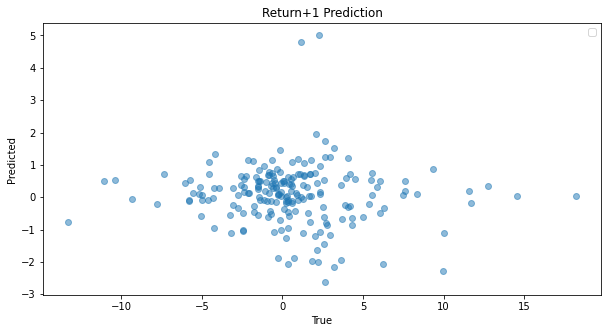

In [11]:
graph_prediction(y_test, y_pred)

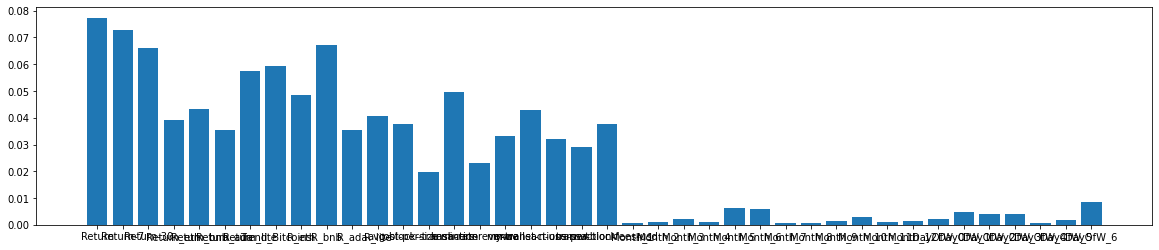

In [12]:
var_importance(reg_random)

#### ExtrasTrees

No handles with labels found to put in legend.


MAE :  2.895704612105379
MSE :  17.785795203018242
MAPE :  1.1953968356877662
R2 Score :  -0.04796329767711027


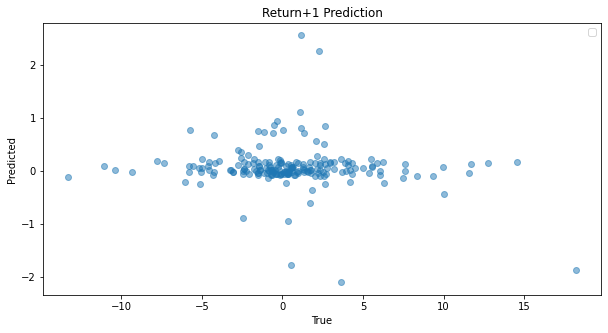

In [13]:
xtrees = ExtraTreesRegressor()

parameters = { 
    'n_estimators': [100, 200, 500],
    'max_depth' : [5,10,20,30,40],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 4, 8],
    'criterion' :['mse']
}

xtrees_random = RandomizedSearchCV(xtrees, parameters, n_jobs=-1, verbose=False, cv=rkf)
xtrees_random.fit(X_train, y_train)
y_pred = xtrees_random.predict(X_test)

graph_prediction(y_test, y_pred)

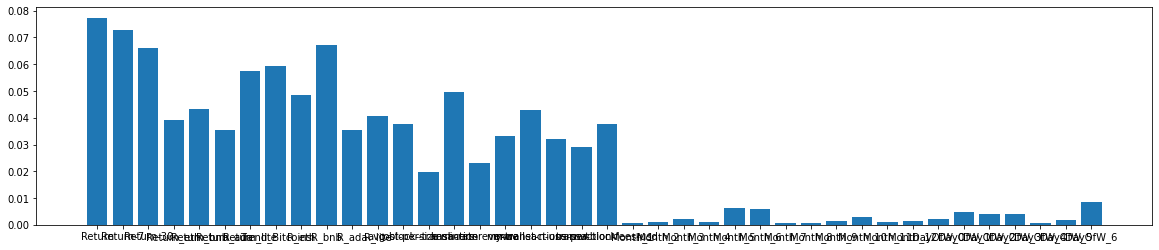

In [14]:
var_importance(reg_random)

#### XGBoost

[15:40:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


No handles with labels found to put in legend.


MAE :  2.8802265008886265
MSE :  17.401383224931998
MAPE :  1.1379650558235208
R2 Score :  -0.025313219925541475


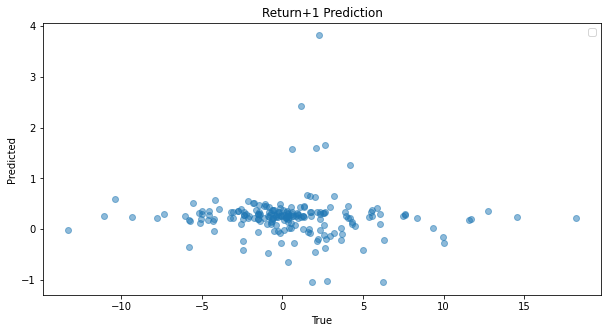

In [15]:
xgb = XGBRegressor()

params_xgb = {
              'objective':['reg:linear', 'reg:squarederror'],
              'learning_rate': [.03, .05, .01], 
              'max_depth': [4, 6, 8],
              'min_child_weight': [1, 3],
              'subsample': [0.6, 1]}

xgb_random = RandomizedSearchCV(xgb, params_xgb, n_jobs=-1, verbose=False, cv=rkf)
xgb_random.fit(X_train, y_train)
y_pred = xgb_random.predict(X_test)

graph_prediction(y_test, y_pred)

#

## Hourly Dataset

In [16]:
df_h = pd.read_csv("HourlyDataset.csv", index_col=0)
df_h = df_h.set_index('Date')
df_h = df_h.dropna()

In [17]:
for column in ['Month', 'DayOfW']:
  dummies = pd.get_dummies(df_h[column], prefix=column)
  df_h[dummies.columns] = dummies

In [18]:
data = df_h.drop(columns=['target_bin', 'target_multi', 'Month', 'DayOfW'])
X, y = data.drop(columns=['Return+1']), data['Return+1']
column_list = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print("Shape", X_train.shape, X_test.shape)

Shape (13404, 44) (3351, 44)


In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

#### Random Forest

In [20]:
rfc =  RandomForestRegressor()

params_rf = { 
    'n_estimators': [200, 500, 750],
    'max_depth' : [20, 40, 50],
    'criterion' :['mse']
}

reg_random = RandomizedSearchCV(rfc, params_rf, n_jobs=-1, cv=2)
reg_random.fit(normalized_train, y_train)
y_pred = reg_random.predict(X_test)


c:\Users\mathy\Anaconda3\envs\NLP\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


No handles with labels found to put in legend.


MAE :  0.7295336102809264
MSE :  0.9873745958215545
MAPE :  1990975326945.8367
R2 Score :  -0.5804167285881663


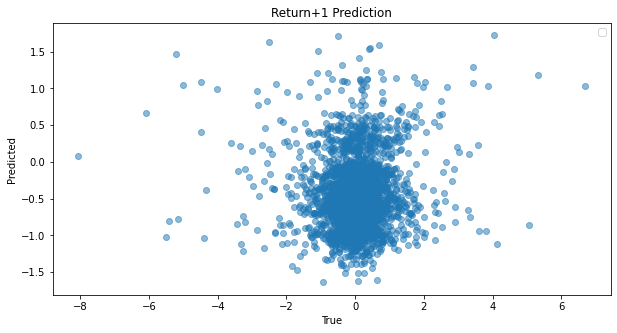

In [21]:
graph_prediction(y_test, y_pred)

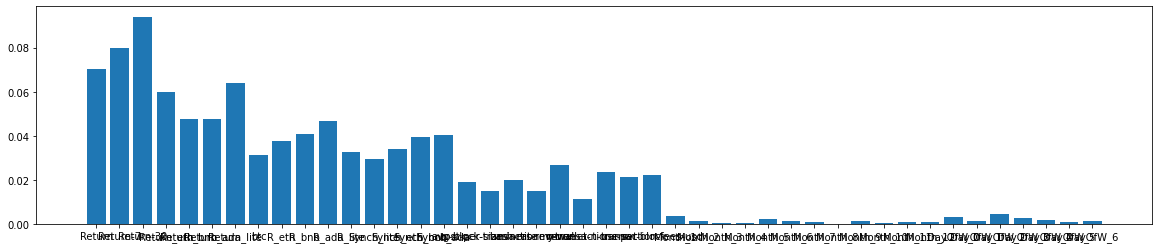

In [22]:
var_importance(reg_random)